## AmirReza Azari
## 99101087

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials. 
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5. 

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [1]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    y = 0.1 * X**5 + X**4 - 2 * X**3 + 7 * X**2 - 9 * X + 3
    y += np.random.normal(0, noise_std, num_samples)
    return X, y

1000
1000


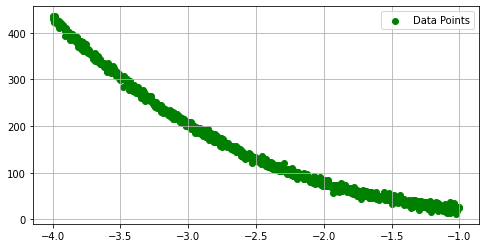

In [2]:
import matplotlib.pyplot as plt

X, y = generate_dataset(-4, -1, 1000)
print(len(X))
print(len(y))

# Plot the data
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='green', label='Data Points')
plt.legend()
plt.grid(True)
plt.show()

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [3]:
from sklearn.model_selection import train_test_split

degree = 5
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, 200)
print(len(X_test_in_range), len(X_test_out_of_range))
print(len(y_test_in_range), len(y_test_out_of_range))

200 200
200 200


## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def train_polynomial_regression(X, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    model = make_pipeline(polynomial_features, linear_regression)
    model.fit(X.reshape(-1, 1), y)
    
    return model

In [5]:
models = {}
# TODO: Put the models with different degrees in the models dict
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X_train, y_train, d)

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [6]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    for d, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        losses[d] = mean_squared_error(y_test, y_pred)
    return losses

In [7]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change. 


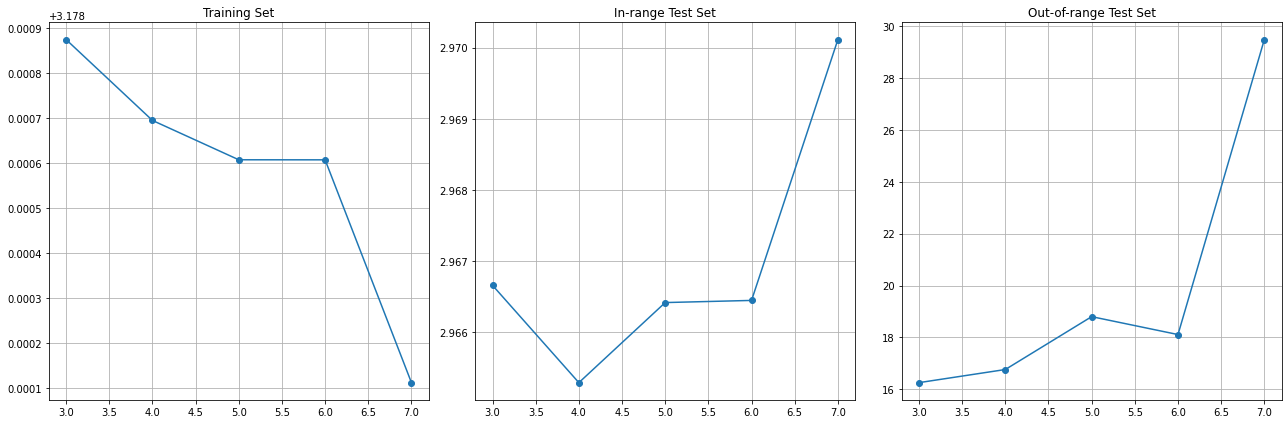

In [8]:
degrees = range(3, 8)

losses_train_avg = {degree: 0 for degree in degrees}
losses_in_range_avg = {degree: 0 for degree in degrees}
losses_out_of_range_avg = {degree: 0 for degree in degrees}

for degree in degrees:
    losses_train_avg[degree] = np.log(losses_train[degree])
    losses_in_range_avg[degree] = np.log(losses_in_range[degree])
    losses_out_of_range_avg[degree] = np.log(losses_out_of_range[degree])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.plot(degrees, [losses_train_avg[d] for d in degrees], marker='o')
ax1.set_title('Training Set')
ax1.grid(True)

ax2.plot(degrees, [losses_in_range_avg[d] for d in degrees], marker='o')
ax2.set_title('In-range Test Set')
ax2.grid(True)

ax3.plot(degrees, [losses_out_of_range_avg[d] for d in degrees], marker='o')
ax3.set_title('Out-of-range Test Set')
ax3.grid(True)

plt.tight_layout()
plt.show()


## Conclusion (10 Points)

Now print out the losses on each set here. 

In [9]:
print("Training:")
for degree, loss in losses_train.items():
    print(f"{degree}: {loss}")

print("\nIn-range:")
for degree, loss in losses_in_range.items():
    print(f"{degree}: {loss}")

print("\nOut-of-range:")
for degree, loss in losses_out_of_range.items():
    print(f"{degree}: {loss}")

Training:
2: 31.66532977418629
3: 24.01972146501156
4: 24.01539988773059
5: 24.013297424189304
6: 24.013294241389985
7: 24.001392234296976

In-range:
2: 28.01460201124373
3: 19.42691160909528
4: 19.400382002255327
5: 19.42221417258877
6: 19.422800769222896
7: 19.494095739013623

Out-of-range:
2: 244025.61047296942
3: 11427951.476113642
4: 18961147.590279646
5: 145904469.18775713
6: 73111465.80727085
7: 6429397244593.315


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**
<br _> 
```
=>
When we look at how the model performs on different sets of data, we see some interesting things. First, when we compare how well it does on the data it was trained on versus new similar data, it's a little worse with the new data. This suggests it might be trying too hard to fit the training data perfectly, which isn't great for handling new stuff.

Then, when we test it on data that's really different from what it was trained on, especially with more complex models, it does much worse. This means it's not good at adapting to totally new situations. It's like when you study hard for a math test but then get surprised by a question that's completely different from what you practiced.

So, while the model is okay at balancing these problems, it's not perfect. It's like trying to walk a tightrope—too much leaning in one direction, and you might fall off. This tells us we need to find a balance between making the model good at what it's trained on and making sure it can handle new things too.

In another way:
=> 

The loss function exhibits an upward trend as the degree increases in cases of out-of-range data. As anticipated, the disparity in loss between the training set and the in-range test set remains minimal. This observation highlights that lower degrees exhibit high bias and low variance for out-of-range test sets, while higher degrees manifest both high bias and high variance. Overfitting on the training set results in reduced generalization to unseen data, as evidenced by the significant disparity in losses between the out-of-range test set and both the training set and the in-range test set, attributable to overfitting.
```


Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.